### Imports

In [109]:
import numpy as np
import matplotlib.pyplot as plt

## Illustration of Markov’s, Chebyshev’s, and Hoeffding’s Inequalities

In [110]:
# Number of repetitions
num_repetitions = 1000000

# Number of coin flips
num_coinflips = 20

#bias
bias = 0.5

# Simulate the experiments
experiments = np.random.binomial(num_coinflips, bias, num_repetitions)
# calculate the frequency of each experiment
experiment_frequency = experiments / num_coinflips
print(experiment_frequency)
# alpha values
a = np.arange(0.5, 1.05, 0.05)

[0.6  0.4  0.3  ... 0.8  0.55 0.35]


In [111]:

#check if the frequency is less than or equal to the alpha
test1 = []
for i in a:
    test = np.copy(experiment_frequency)
    test[test >= i]= True
    test[test < i]= False
    list1 = np.sum(test) / num_repetitions
    test1.append(list1)


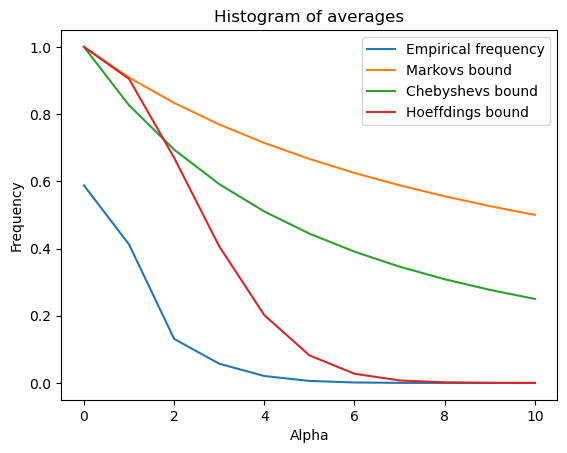

In [112]:
# plot the histogram

# Markovs inequality -
# P(X>=alpha)<=E(x)/alpha
Markovs_bound = 0.5/a

# Chebyshev's inequality -
# P(|X−E[X]|≥ε)≤ Var[X].
Chebyshevs_bound = 0.5*(1-0.5)/(a**2)

# Hoeffding's inequality -
# P(|X−E[X]|≥ε)≤ 2exp(−2ε^2N)
Hoeffdings_bound = np.exp(-2*(a-0.5)**2*num_coinflips)


plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.title('Histogram of averages')
plt.plot(test1, label = 'Empirical frequency')
plt.plot(Markovs_bound, label = 'Markovs bound')
plt.plot(Chebyshevs_bound, label = 'Chebyshevs bound')
plt.plot(Hoeffdings_bound, label = 'Hoeffdings bound')
plt.legend()

### For α = 1 and α = 0.95 calculate the exact probability P( 1/20  ∑ 20i=1 X_i ≥ α).

In [113]:
print(test1[9:11])

[0.0, 0.0]


### 2.b

[0.05 0.15 0.05 ... 0.2  0.   0.1 ]


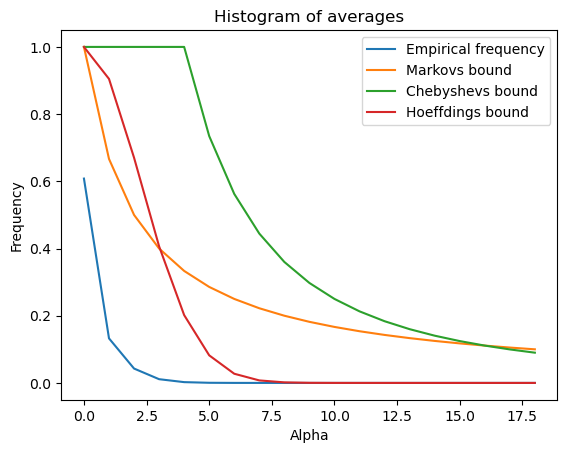

In [126]:
# Number of repetitions
num_repetitions = 1000000

# Number of coin flips
num_coinflips = 20

#bias
bias = 0.1

# Simulate the experiments
experiments = np.random.binomial(num_coinflips, bias, num_repetitions)
# calculate the frequency of each experiment
experiment_frequency = experiments / num_coinflips
print(experiment_frequency)
# alpha values
a = np.arange(0.1, 1.05, 0.05)


#check if the frequency is less than or equal to the alpha
test1 = []
for i in a:
    test = np.copy(experiment_frequency)
    test[test >= i]= True
    test[test < i]= False
    list1 = np.sum(test) / num_repetitions
    test1.append(list1)

# plot the histogram

# Markovs inequality -
# P(X>=alpha)<=E(x)/alpha
Markovs_bound_1 = 0.1/a
# for n in range(len(Markovs_bound_1)):
#     if Markovs_bound_1[n] > 1:
#        Markovs_bound_1[n] = 1

# Chebyshev's inequality -
# P(|X−E[X]|≥ε)≤ Var[X].
Chebyshevs_bound_1 = 0.1*(1-0.1)/(a**2)

for n in range(len(Chebyshevs_bound_1)):
    if Chebyshevs_bound_1[n] > 1:
       Chebyshevs_bound_1[n] = 1
       

    

# Hoeffding's inequality -
# P(|X−E[X]|≥ε)≤ 2exp(−2ε^2N)
Hoeffdings_bound_1 = np.exp(-2*(a-0.1)**2*num_coinflips)


plt.xlabel('Alpha')
plt.ylabel('Frequency')
plt.title('Histogram of averages')
plt.plot(test1, label = 'Empirical frequency')
plt.plot(Markovs_bound_1, label = 'Markovs bound')
plt.plot(Chebyshevs_bound_1, label = 'Chebyshevs bound')
plt.plot(Hoeffdings_bound_1, label = 'Hoeffdings bound')
plt.legend()


# 2 The Role of Independence